In [ ]:
import pandas as pd

# Ładowanie sygnału z pliku
data = pd.read_csv('BAZBMS21_003_Gabor_experiment_2021_lip_16_0928.csv')

In [2]:
traj = data[['gaze_x', 'gaze_y']].to_numpy()
x, y = traj.T[0], traj.T[1]

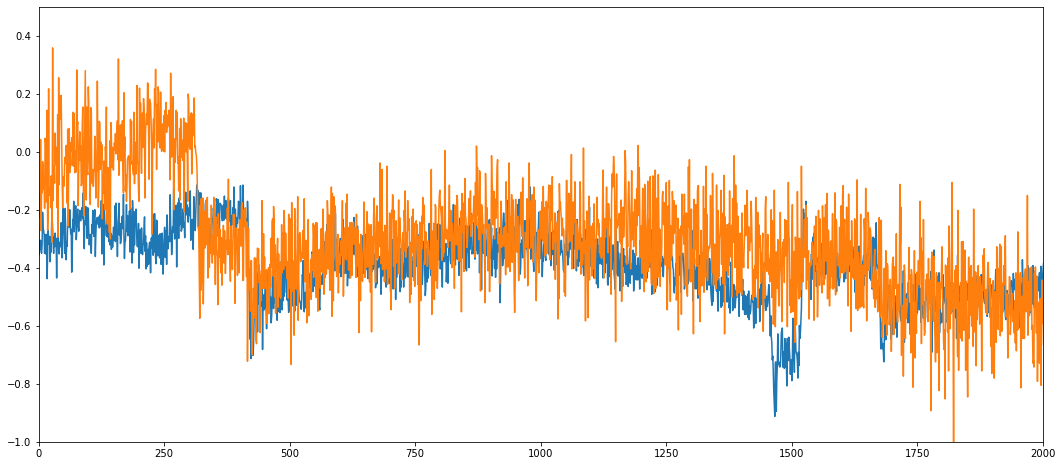

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.plot(traj)
plt.xlim((0,2e3))
plt.ylim((-1, .5))
plt.show()

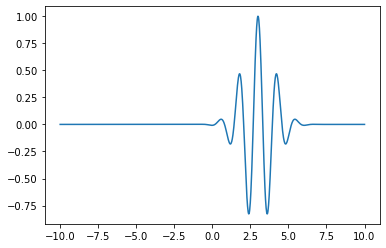

In [4]:
%matplotlib inline

import numpy as np

# Falka morlet, za pomocą której dokonuję transformaty
time = np.linspace(-10, 10, 1000)
shift = 3
plt.close('all')
wavelet_morlet = np.exp(-((time-shift)**2)/2 ) * np.cos((time-shift) * 5)
plt.plot(time, wavelet_morlet)
plt.show()

C:\Users\matir\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


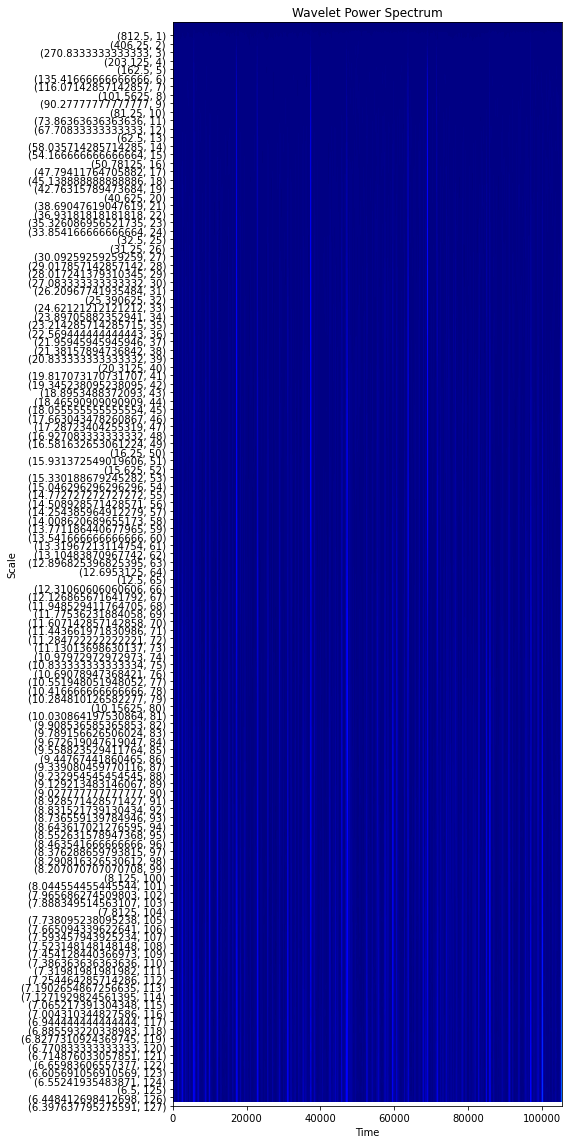

In [5]:
%matplotlib inline
import numpy as np
import pywt

# wybór falki matki
wavelet_name = 'morl'
# ustawienie skali falek
scales = np.arange(1, 128)

# Ciągła transformata falkowa, za pomocą któej tworzę skalogram
coefficients, frequencies = pywt.cwt(x, scales, wavelet_name, sampling_period=1e-3)
power = (np.abs(coefficients))  # Absolutne wartości mocy


plt.figure(figsize=(8,16))
plt.imshow(power, aspect='auto', cmap='jet')
plt.title('Wavelet Power Spectrum')
plt.xlabel('Time')
plt.ylabel('Scale')

plt.yticks(scales, zip(frequencies, scales))

plt.tight_layout()
plt.show()

In [6]:
pywt.scale2frequency(wavelet_name, scales)/1e-3

array([812.5       , 406.25      , 270.83333333, 203.125     ,
       162.5       , 135.41666667, 116.07142857, 101.5625    ,
        90.27777778,  81.25      ,  73.86363636,  67.70833333,
        62.5       ,  58.03571429,  54.16666667,  50.78125   ,
        47.79411765,  45.13888889,  42.76315789,  40.625     ,
        38.69047619,  36.93181818,  35.32608696,  33.85416667,
        32.5       ,  31.25      ,  30.09259259,  29.01785714,
        28.01724138,  27.08333333,  26.20967742,  25.390625  ,
        24.62121212,  23.89705882,  23.21428571,  22.56944444,
        21.95945946,  21.38157895,  20.83333333,  20.3125    ,
        19.81707317,  19.3452381 ,  18.89534884,  18.46590909,
        18.05555556,  17.66304348,  17.28723404,  16.92708333,
        16.58163265,  16.25      ,  15.93137255,  15.625     ,
        15.33018868,  15.0462963 ,  14.77272727,  14.50892857,
        14.25438596,  14.00862069,  13.77118644,  13.54166667,
        13.31967213,  13.10483871,  12.8968254 ,  12.69

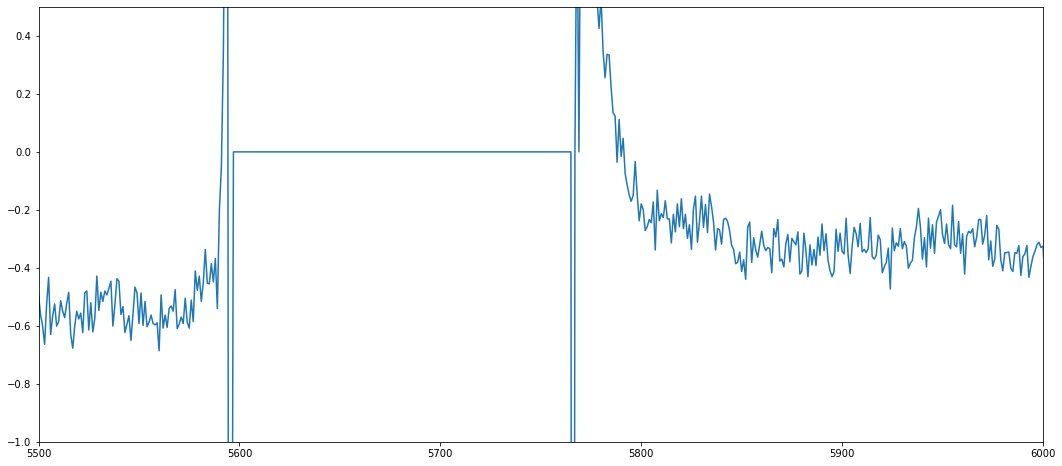

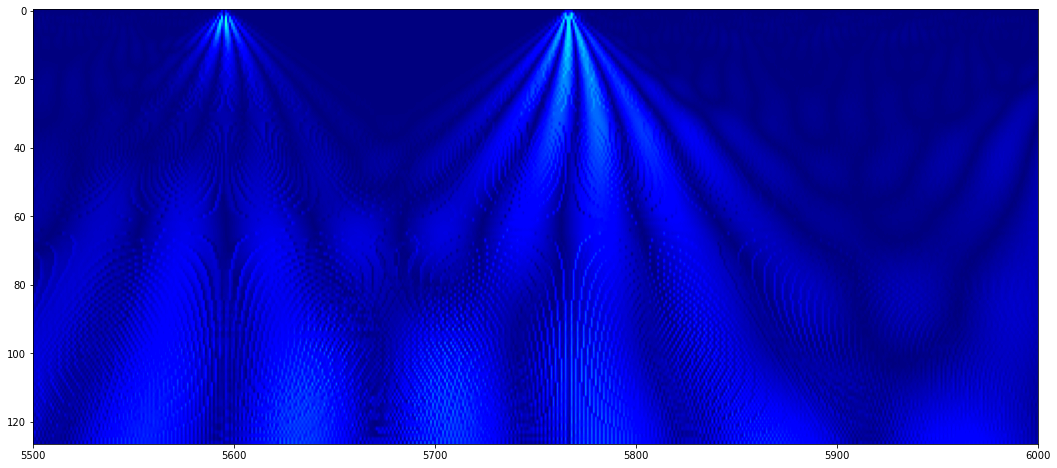

In [7]:
%matplotlib inline

x_bound = (5.5e3, 6e3)
y_bound = (-1, .5)

# inspekcja miejsc charakterystycznych jak wygląda skalogram w danej chwili czasowej
plt.figure(figsize=(18,8))
plt.plot(x)
plt.xlim(x_bound)
plt.ylim(y_bound)
plt.figure(figsize=(18,8))
plt.imshow(power, aspect='auto', cmap='jet')
plt.xlim(x_bound)
# plt.ylim(y_bound)
plt.show()

In [8]:
sparse_coeffs = coefficients.copy()
# sparse_coeffs[:10, :] = 0

In [9]:
# ręczne próby dokonania odwrtonej ciągłej transformaty
mwf = pywt.ContinuousWavelet('morl').wavefun() # weź y i x falki
y_0 = mwf[0][np.argmin(np.abs(mwf[1]))] # weź środkowy element

# dodaję współczynniki po skalach (występujące w tym samym czasie), ale uprzednio dzielę współczynniki przez pierwiatek skali
r_sum = np.sum(sparse_coeffs.T / (scales ** 0.5), axis=-1).T 
reconstructed = r_sum * (1 / y_0)

In [10]:
reconstructed

array([ 5.94503325e-03, -1.34900606e+00, -2.14380329e+00, ...,
       -1.40901452e+01, -1.14698608e+01, -9.03254908e+00])

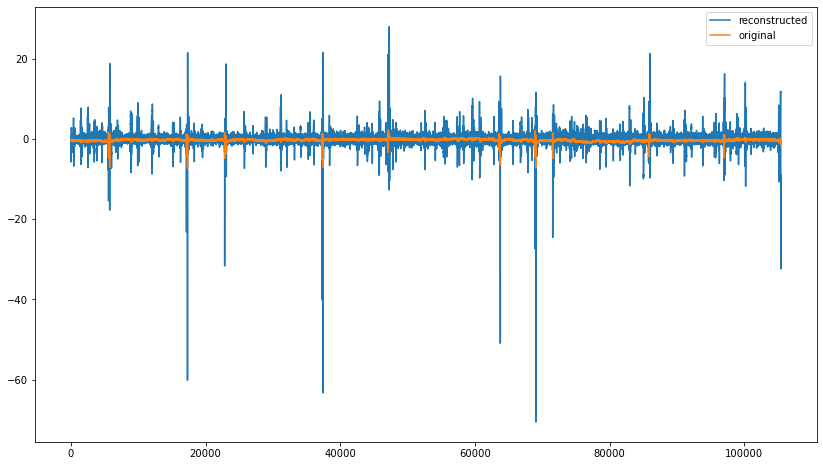

In [11]:
%matplotlib inline

plt.close('all')
plt.figure(figsize=(14,8))
plt.plot(reconstructed, label='reconstructed')
plt.plot(x, label='original')
plt.legend()
plt.show()

# Discrete wavelet transform

In [12]:
import pywt
import numpy as np

# Define input signal
signal = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Perform discrete wavelet transform
wavelet_name = 'db4'
# Decompose signal into aproximation and detail components 6 times.
# The DWT operates through a series of filtering and downsampling operations.
# In each level of the decomposition, the signal is passed through a low-pass filter and a high-pass filter.
# The low-pass filter extracts the approximation coefficients by capturing the low-frequency components,
# while the high-pass filter extracts the detail coefficients by capturing the high-frequency components.
coefficients = pywt.wavedec(x, wavelet_name, level=6)

for i in range(4, len(coefficients)):
    coefficients[i].fill(0)
# Reconstruct the signal using the inverse discrete wavelet transform
reconstructed_signal = pywt.waverec(coefficients, wavelet_name)

# Print the results
print("Original Signal:", x)
print("Approximately Reconstructed Signal:", reconstructed_signal)


Original Signal: [-0.25562012 -0.3542795  -0.32513016 ... -1.0314474  -0.9417563
 -0.9978132 ]
Approximately Reconstructed Signal: [-0.31776847 -0.31457515 -0.31132268 ... -1.00923536 -0.99285159
 -0.97110747]


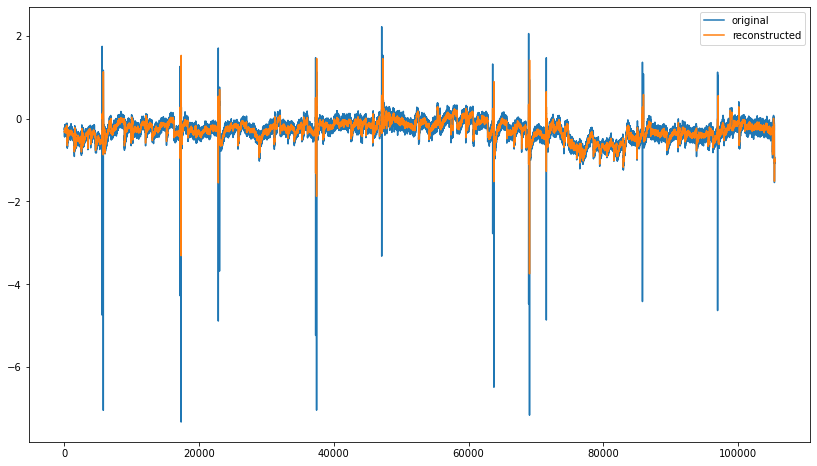

In [13]:
# show reconstructed signal
%matplotlib inline
plt.figure(figsize=(14, 8))
plt.plot(x, label='original')
plt.plot(reconstructed_signal, label='reconstructed')
plt.legend()
plt.show()

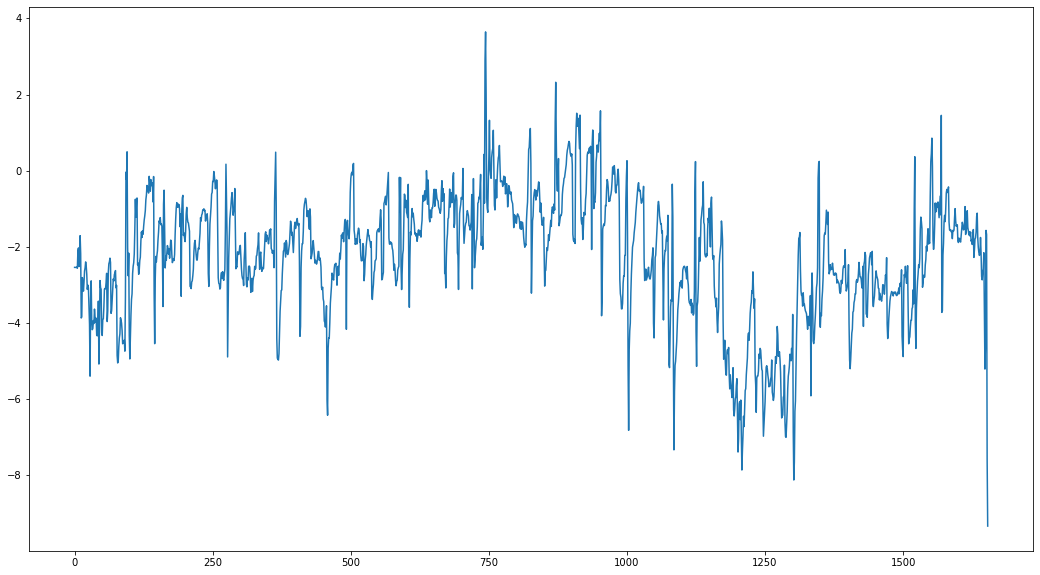

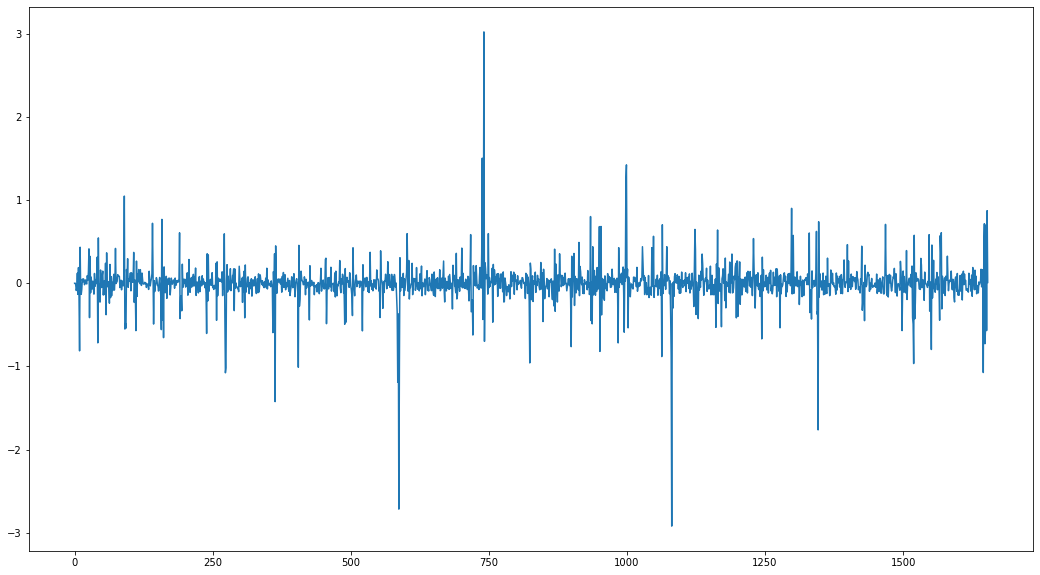

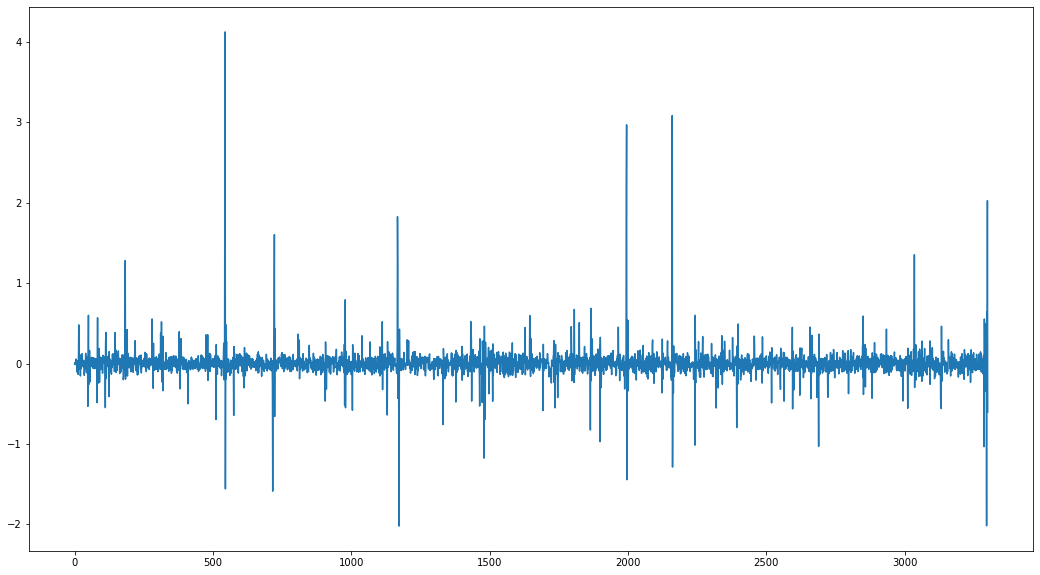

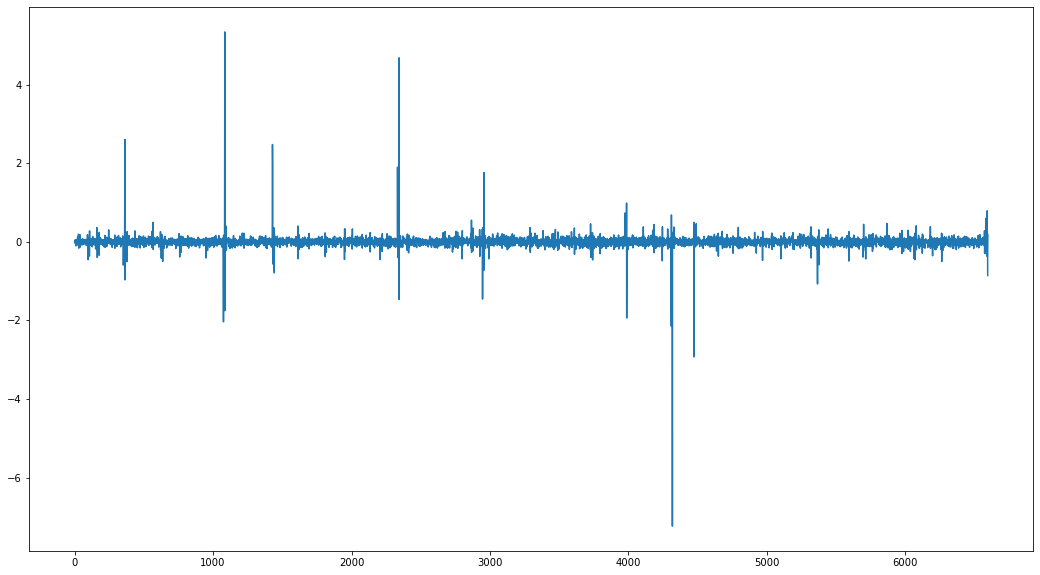

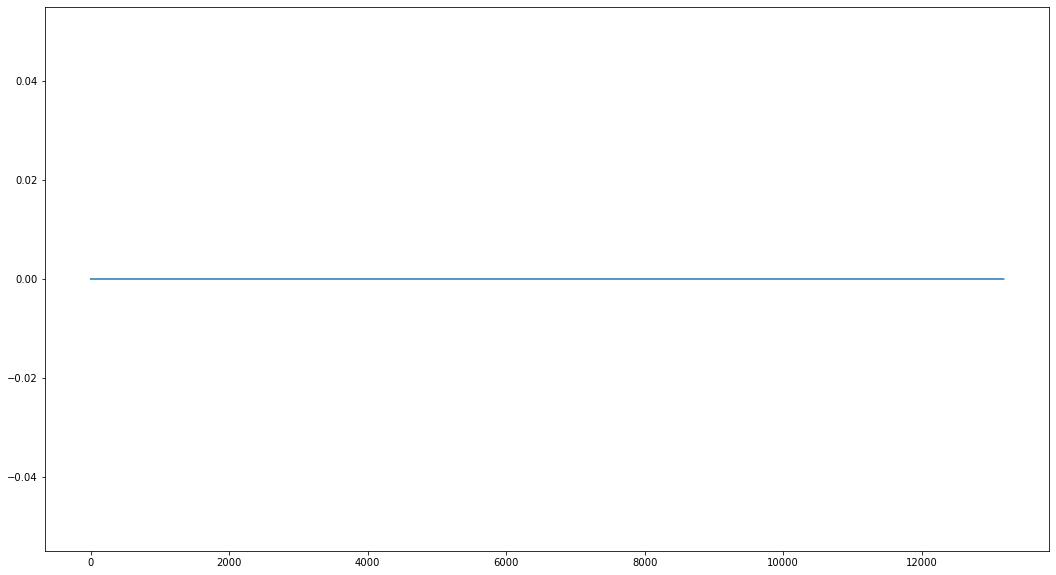

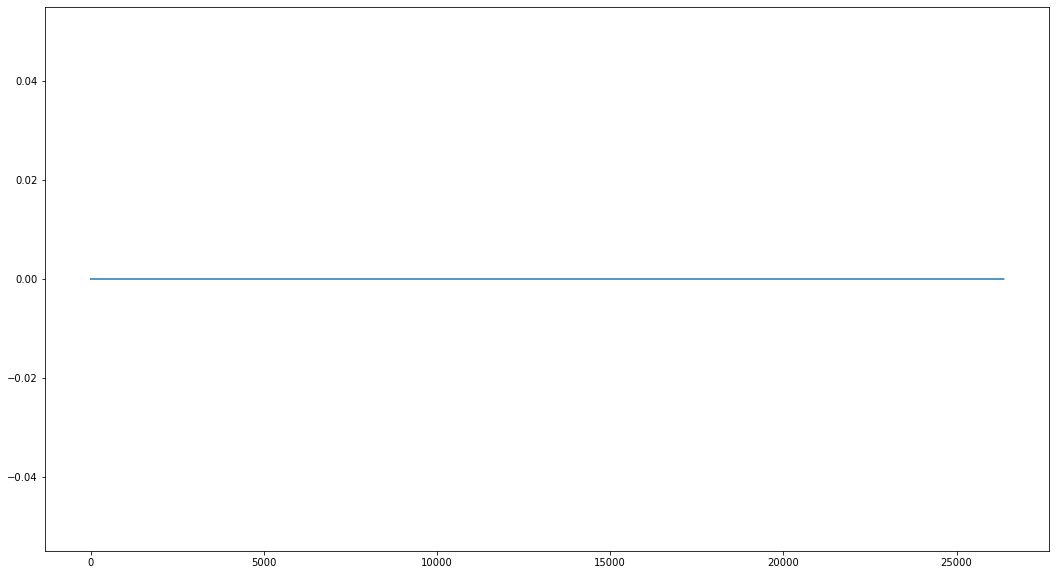

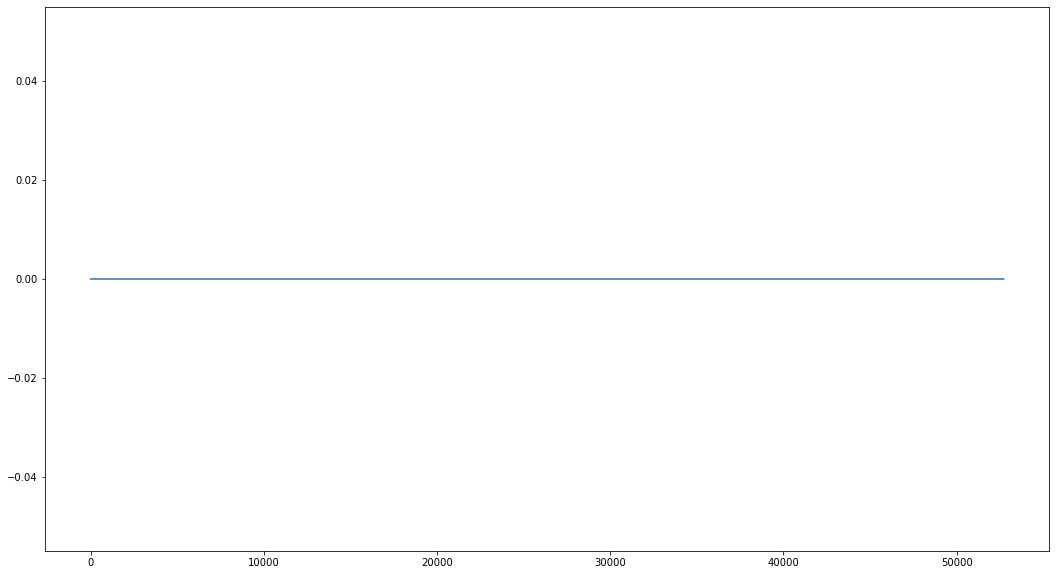

In [14]:
%matplotlib inline
plt.close('all')

# show components took into reconstruction process 
for c in coefficients:
    plt.figure(figsize=(18,10))
    plt.plot(c)
#     plt.ylim((-2,2))
    plt.show()

In [15]:
traj = data[['gaze_x', 'gaze_y']].to_numpy()
x, y = traj.T[0], traj.T[1]

In [16]:
x = x[:1000]
y = y[:1000]
Fs = 1000

In [17]:
time = np.linspace(0, len(x)/Fs, len(x))

In [18]:
import gc

gc.collect()

42537

# Perform time-frequency analysis on original and reconstructed signal. Change power to decibels scale

## For original

In [19]:
from scipy.fft import fft, ifft, fftfreq

def hanning_window(window_length):
    return 0.5 - 0.5 * np.cos(2 * np.pi * np.arange(window_length) / (window_length - 1))

def hanning_taper(signal):
    window = hanning_window(len(signal))
    tapered_signal = signal * window
    return tapered_signal

observing_time = .5 # in seconds. Determine for how much time observe the signal. Frequency resolution is 1/T [Hz]

window_size_for_signal_tapering = int(observing_time * Fs)

fy = fft(x[:window_size_for_signal_tapering])
fx = fftfreq(len(time))
fy = np.abs((fy - fy.mean())/fy.std()) # standarize
fx = fx[:len(fx)//2+1] # cut off "mirror"
fy = fy[:len(fy)//2+1] # cut off "mirror"

bound = len(y)-window_size_for_signal_tapering+1
time_frequency_analysis = np.zeros((bound, len(fy)))
time_frequency_analysis[0, :] = fy

# Slide window to perform time-frequency analysis
for i in range(1, bound, 1):
    fy = fft(x[i:window_size_for_signal_tapering+i+1])
    fy = np.abs((fy - fy.mean())/fy.std()) # standarize
    fy = fy[:len(fy)//2+1] # cut off "mirror"
    time_frequency_analysis[i, :] = fy
    
    if i % 1e3 == 0:
        print(f'{i/bound*100:.2f}%')

In [29]:
def lin_to_db(x):
    return 20 * np.log10(x)

### Show spectrogram

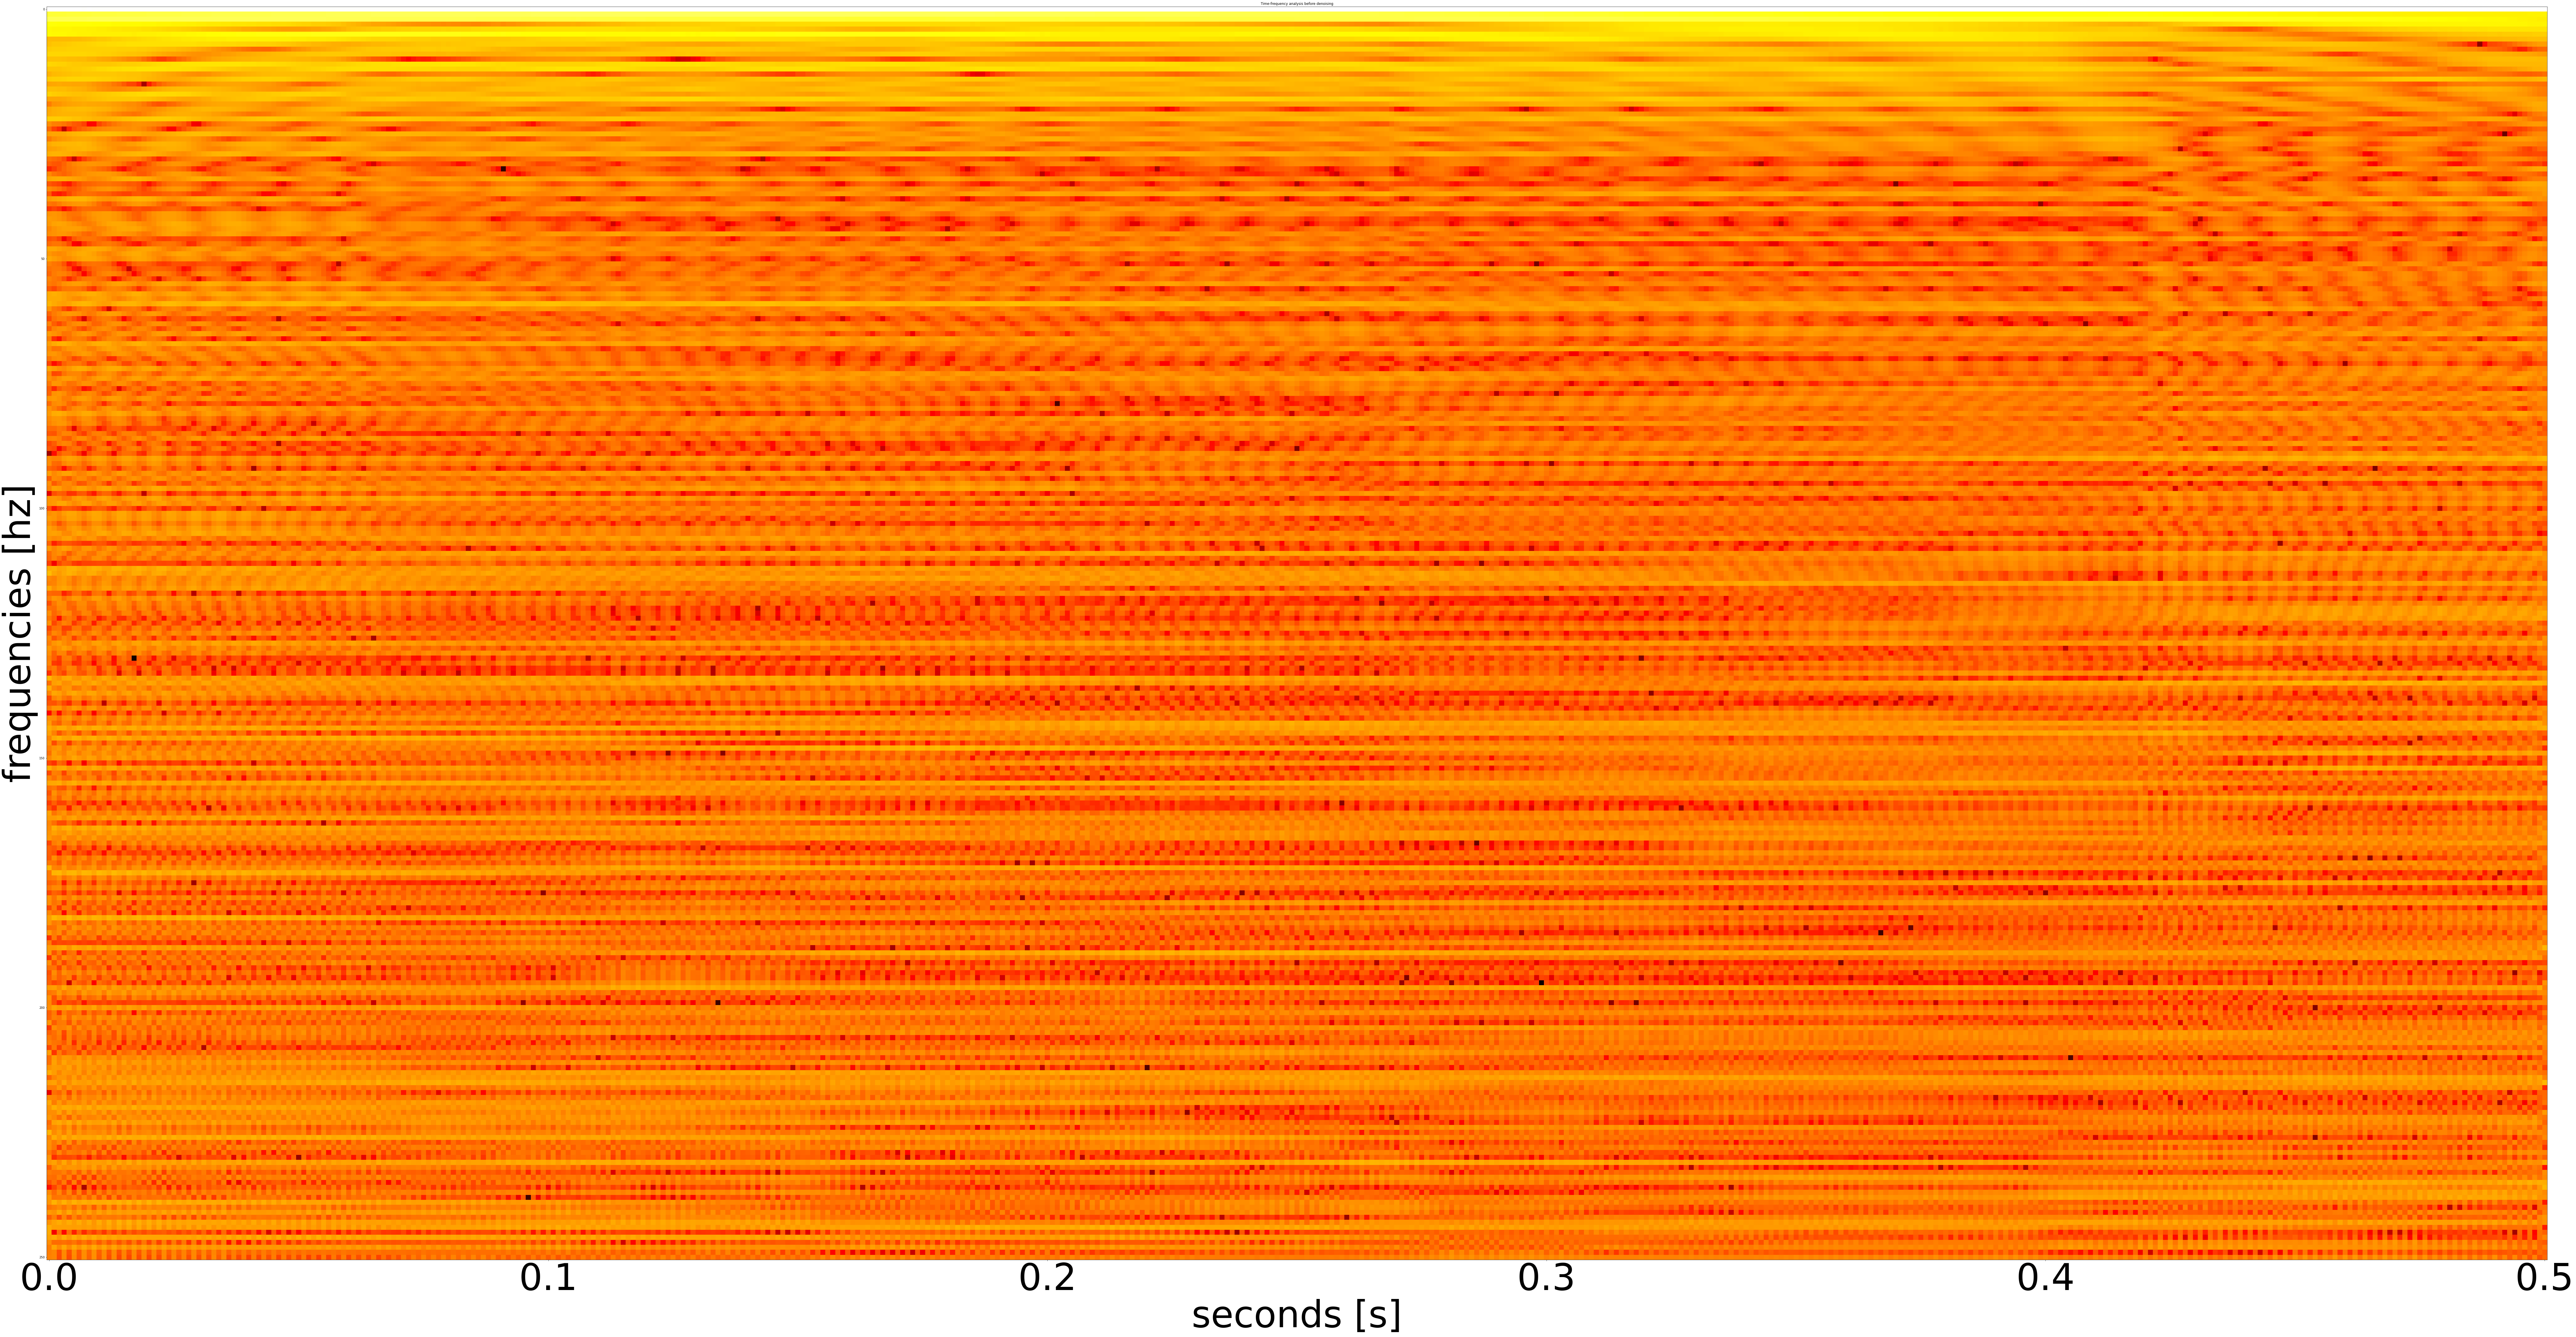

In [30]:
%matplotlib inline

plt.close('all')
plt.figure(figsize=(200,80))
plt.title('Time-frequency analysis before denoising')

plt.xlabel('seconds [s]', fontsize=128)
plt.ylabel('frequencies [hz]', fontsize=128)
x_ticks = np.arange(0, len(data), 100)
plt.xticks(x_ticks, x_ticks/Fs, fontsize=128)
# plt.yticks(fx, fx, fontsize=128)

plt.imshow(lin_to_db(time_frequency_analysis.T), cmap='hot', interpolation='nearest')
plt.show()

## For reconstructed

In [31]:
rx = reconstructed_signal[:1000]

In [32]:
from scipy.fft import fft, ifft, fftfreq

def hanning_window(window_length):
    return 0.5 - 0.5 * np.cos(2 * np.pi * np.arange(window_length) / (window_length - 1))

def hanning_taper(signal):
    window = hanning_window(len(signal))
    tapered_signal = signal * window
    return tapered_signal

observing_time = .5 # in seconds. Determine for how much time observe the signal. Frequency resolution is 1/T [Hz]

window_size_for_signal_tapering = int(observing_time * Fs)

fy = fft(rx[:window_size_for_signal_tapering])
fx = fftfreq(len(time))
fy = np.abs((fy - fy.mean())/fy.std()) # standarize
fx = fx[:len(fx)//2+1] # cut off "mirror"
fy = fy[:len(fy)//2+1] # cut off "mirror"

bound = len(y)-window_size_for_signal_tapering+1
time_frequency_analysis = np.zeros((bound, len(fy)))
time_frequency_analysis[0, :] = fy

# Slide window to perform time-frequency analysis
for i in range(1, bound, 1):
    fy = fft(rx[i:window_size_for_signal_tapering+i+1])
    fy = np.abs((fy - fy.mean())/fy.std()) # standarize
    fy = fy[:len(fy)//2+1] # cut off "mirror"
    time_frequency_analysis[i, :] = fy
    
    if i % 1e3 == 0:
        print(f'{i/bound*100:.2f}%')

### Show spectrogram

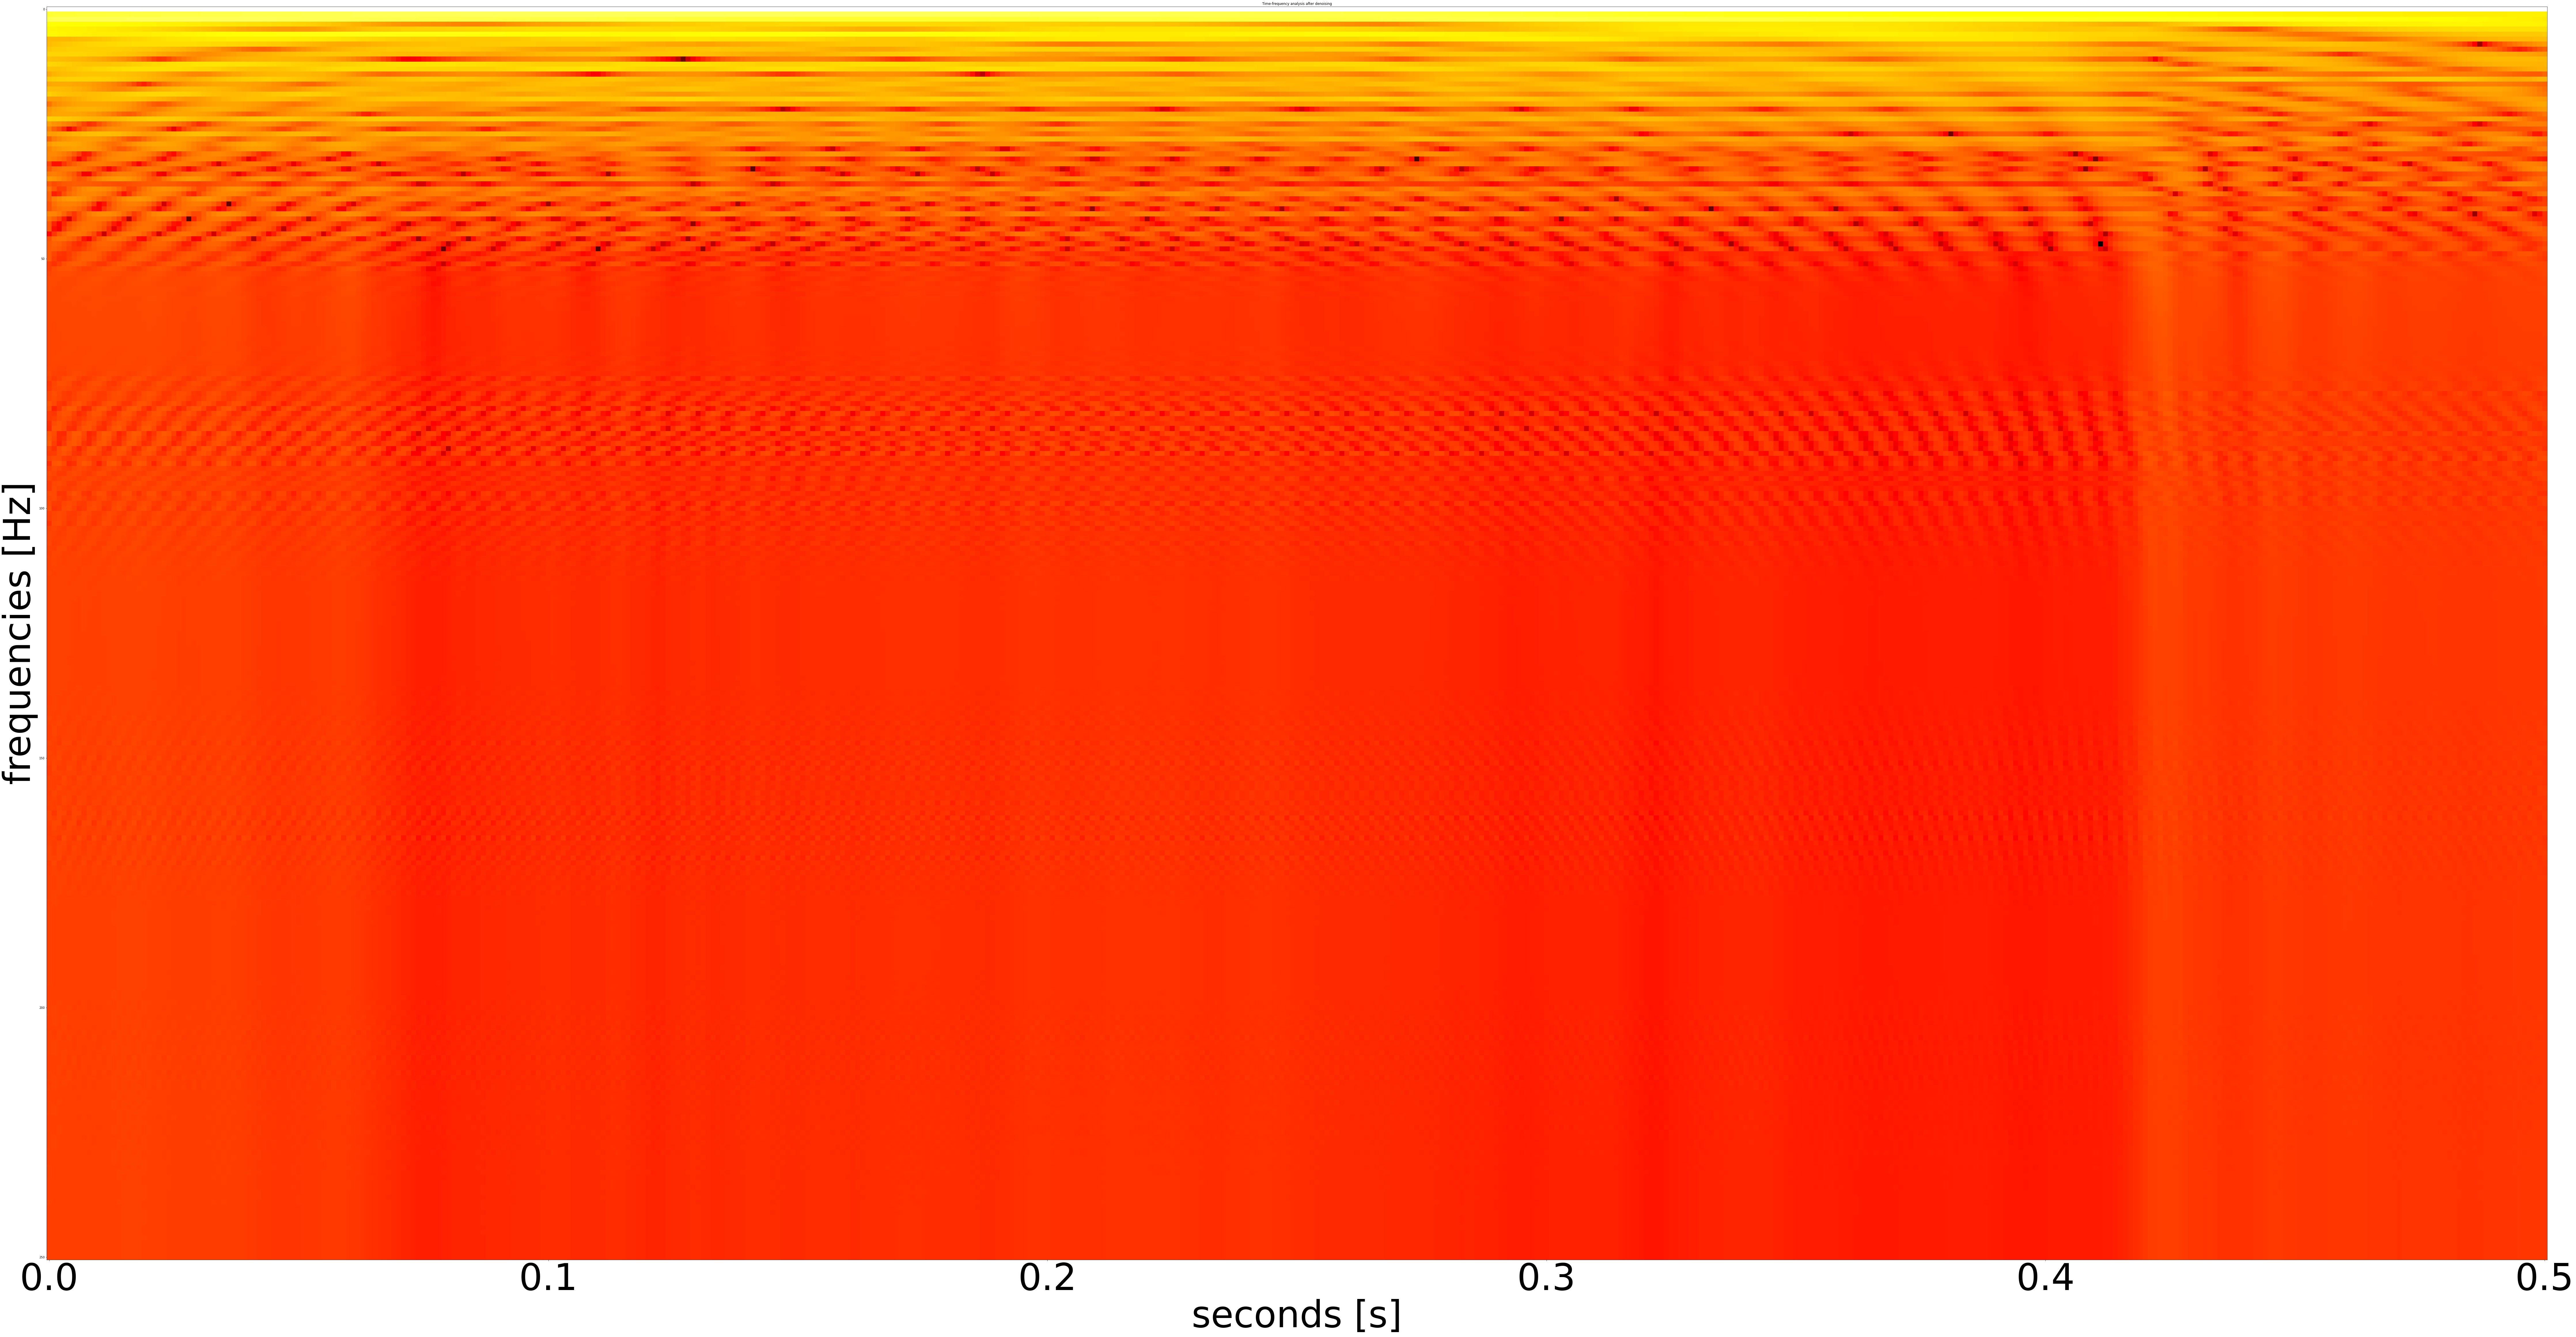

In [33]:
%matplotlib inline

plt.close('all')
plt.figure(figsize=(200,80))
plt.title('Time-frequency analysis after denoising')

plt.xlabel('seconds [s]', fontsize=128)
plt.ylabel('frequencies [Hz]', fontsize=128)
x_ticks = np.arange(0, len(data), 100)
plt.xticks(x_ticks, x_ticks/Fs, fontsize=128)
# plt.yticks(fx, fx, fontsize=128)

plt.imshow(lin_to_db(time_frequency_analysis.T), cmap='hot', interpolation='nearest')
plt.show()